In [30]:
from utils.random_board import generate_random_board
from utils.stockfish import gest_best_move
import os

board = generate_random_board()
print(board)
print(board.legal_moves)
move = gest_best_move(board, 10)
print(move)


r q . . . b . r
. . . . p . p .
p . p . k . . p
. p . . . p . .
. n p . . . . .
P . . P B N P P
Q . . . K P . R
R N . B . . . .
<LegalMoveGenerator at 0x192eba14a00 (Ng5+, Ne5, Nh4, Nd4+, Nfd2, Ng1, Ne1, Ba7, Bxh6, Bb6, Bg5, Bc5, Bf4, Bd4, Bd2, Bc1, Rg2, Rh1, Kd2, Kf1, Ke1, Qxc4+, Qb3, Qd2, Qc2, Qb2, Ba4, Bb3, Bc2, Nc3, Nbd2, dxc4, axb4, h4, g4, d4, a4)>
a3b4


In [31]:
import tensorflow as tf

tensor_test = tf.random.uniform((10000,14,8,8), minval=0, maxval=2, dtype=tf.int32)
tensor_test_2 = tf.random.uniform((10000,14,8,8), minval=0, maxval=2, dtype=tf.int32)

In [32]:
import chess
import numpy as np

def convert_square_to_coordinates(square: chess.Square):
    # ex h1 -> (7, 0)
    print(square)
    return (7 - square // 8, square % 8)

print(convert_square_to_coordinates(chess.H1))


7
(7, 7)


In [35]:
done = True

In [36]:
load_dir = "data/test/"
input_path = load_dir + "input"
output_path = load_dir + "output"

input_tensor = load_tensor(input_path, out_type=tf.int32)
output_tensor = load_tensor(output_path, out_type=tf.float32)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 162: invalid start byte

In [ ]:
output_tensor
normalized_tensor = tf.linalg.normalize(output_tensor, axis=0, ord='euclidean', name=None)[0]
print(normalized_tensor.shape)


(19790,)


In [ ]:
# print max value of tensor

print(normalized_tensor.shape)
maxi = tf.math.reduce_max(normalized_tensor)
mini = tf.math.reduce_min(normalized_tensor)
mean = tf.math.reduce_mean(normalized_tensor)
std = tf.math.reduce_std(normalized_tensor)
 
print('max', maxi)
print('min', mini)
print('mean', mean)
print('std', std)

test = normalized_tensor/maxi

print(tf.math.reduce_max(test))
print(tf.math.reduce_min(test))


In [ ]:
max = tf.math.reduce_max(output_tensor)
min = tf.math.reduce_min(output_tensor)
std = tf.math.reduce_std(output_tensor)

abs_max = tf.math.maximum(tf.math.abs(max), tf.math.abs(min))
print(abs_max)
print(output_tensor/abs_max)


In [3]:
from utils.load_model import load_model

import tensorflow as tf
from utils.random_board import generate_random_board
from utils.process_board import convert_board_to_array
from utils.stockfish import get_score

model = load_model('backup/mse_3_64_128_01/')

board = generate_random_board()
score = get_score(board)
x_test = tf.convert_to_tensor(convert_board_to_array(board))
x_test = tf.expand_dims(x_test, axis=0)

y_predict = model.predict(x_test)

print("y_pred: ", y_predict[0,0]*100)
print("y_true: ", score)



1/1 [==============================] - 2s 2s/step
y_pred:  -23.246470093727112
y_true:  -36.24


In [2]:
import tensorflow as tf
import chess
import numpy as np
from utils.process_board import convert_board_to_array
    

def predict_best_move(board: chess.Board, model: tf.keras.Model):
    next_turn = 1*board.turn
    if board.is_checkmate():
        return None, None
    nb_moves = board.legal_moves.count()
    array = np.zeros((nb_moves, 7, 8, 8), dtype=np.int32)
    for i, move in enumerate(board.legal_moves):
        board.push(move)
        array[i] = convert_board_to_array(board)
        board.pop()
    x_tensor = tf.convert_to_tensor(array, dtype=tf.int32)
    y_tensor = model.predict(x_tensor, verbose=0)
    move_list = list(board.legal_moves)
    if next_turn > 0:
        return move_list[np.argmax(y_tensor)], np.max(y_tensor)
    else:
        return move_list[np.argmin(y_tensor)], np.min(y_tensor)

y_tensor = predict_best_move(board, model)




NameError: name 'board' is not defined

In [47]:
board = chess.Board()

In [78]:
board.pop()


Move.from_uci('h8a6')

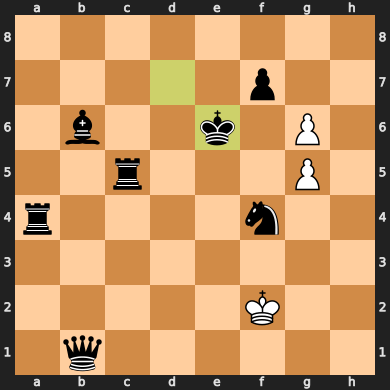

In [145]:
move = 'Rxe6'
move = move.replace('C', 'N').replace('D', 'Q').replace('R','K').replace('T', 'R').replace('F', 'B')
board.push_san(move)
board

g6g7 -99.8328149318695


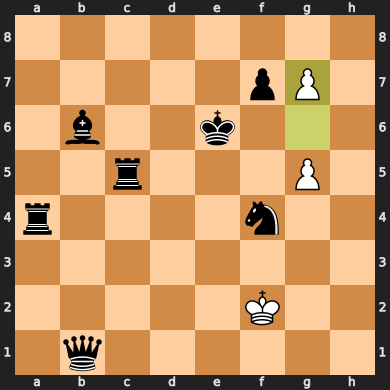

In [146]:
move, score = predict_best_move(board=board, model=model)
board.push(move)
print(move, score*100)
board

In [51]:
from utils.process_tensors import load_tensor

tensor = load_tensor(input_path, out_type=tf.int32)
tensor.shape

TensorShape([55000, 8, 8, 8])

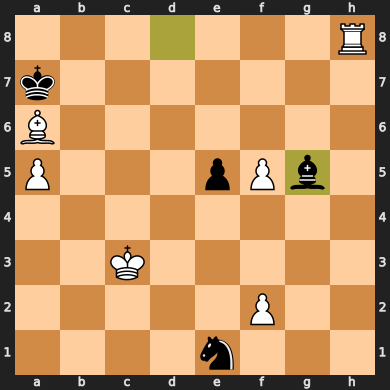

In [1]:
from utils.random_board import generate_random_board
board = generate_random_board()
board